In [14]:
import pandas as pd
import numpy as np
from datetime import datetime
import time
from datetime import date

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score, KFold
from sklearn import linear_model

import matplotlib.pyplot as plt

In [15]:
def df_create():
    df_50 = pd.read_csv('player_list_50.csv')
    df_100 = pd.read_csv('player_list_100.csv')
    df_150 = pd.read_csv('player_list_150.csv')
    df_200 = pd.read_csv('player_list_200.csv')
    df_226 = pd.read_csv('player_list_226.csv')
    df = df_100.append([df_50,df_150, df_200,df_226], ignore_index= True).reset_index(drop = True)
    return df

def data_prep(df):
    cols =['full_name', 'player_id', 'age','rating', 'potential', 'club', 'release_clause', 
           'club_joined', 'contract_valid', 'value', 'wage', 'preff_foot', 'Acceleration', 
           'Aggression', 'Agility', 'Balance', 'Ball Control', 'Composure', 'Crossing', 
           'Curve', 'DOB', 'Dribbling', 'Finishing', 'GK Diving', 'GK Handling', 'GK Kicking',
           'GK Positioning', 'GK Reflexes', 'Heading Accuracy', 'Interceptions', 'Jumping', 
           'Long Passing', 
           'Long Shots', 'Marking', 'Penalties', 'Positioning',
           'Reactions', 'Short Passing', 'Shot Power', 'Sliding Tackle',
           'Sprint Speed', 'Stamina', 'Standing Tackle', 'Strength', 'Vision',
           'Volleys', 'club_jersey', 'club_pos', 'role',
           'country', 'country_jersey', 'country_pos',
           'country_rating','height', 'international_rep', 
           'traits', 'weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM',
           'LCM', 'CM', 'RCM', 'RM', 
           'LWB', 'LDM', 'CDM', 'RDM',
           'RWB', 'LB', 'LCB', 
           'CB', 'RCB', 'RB']

    df['value'] = df['value'].apply(lambda x: float(x.strip('M'))*10**6 if 'M' in x  else (float(x.strip('K'))*10**3 if ('K' in x) else float(x) ))
    df['wage'] = df['wage'].apply(lambda x: float(x.strip('K'))*10**3 if 'K' in x  else 0 )
    df['release_clause'] = df['release_clause'].apply(lambda x: float(x.strip('M'))*10**6 if ((type(x) != float) and ('M' in x)) else (float(x.strip('K'))*10**3 if ((type(x) != float) and ('K' in x)) else 0 ))
    df['contract_valid'] = df['contract_valid'].apply(lambda x: int(x.split(',')[-1]))
    df['club_joined'] = df['club_joined'].apply(lambda x: datetime.strptime(x.replace(',', '').replace(' ', '-'), '%b-%d-%Y').date() if not 'Loaned' in x else date.today())
    df['traits'] = df.traits.fillna(0).apply(lambda x: len(x) if (type(x) != int) else 0)
    df['preff_foot'] = df.preff_foot.fillna(2).apply(lambda x: 1 if (x == 'Right') else 0)
    return df[cols]

def df_reg(df):
    

    reg_cols = [ 'age','preff_foot', 'Acceleration', 'Aggression',
               'Agility', 'Balance', 'Ball Control',
               'Composure', 'Crossing', 'Curve','Dribbling', 'Finishing',
               'GK Diving', 'GK Handling', 'GK Kicking',
               'GK Positioning', 'GK Reflexes', 'Heading Accuracy', 
               'Interceptions', 'Jumping', 'Long Passing', 
               'Long Shots', 'Marking', 'Penalties', 'Positioning',
               'Reactions', 'Short Passing', 'Shot Power', 'Sliding Tackle',
               'Sprint Speed', 'Stamina', 'Standing Tackle', 'Strength', 'Vision',
               'Volleys', 'height', 'international_rep', 
               'traits', 'weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM',
               'LCM', 'CM', 'RCM', 'RM', 
               'LWB', 'LDM', 'CDM', 'RDM',
               'RWB', 'LB', 'LCB', 
               'CB', 'RCB', 'RB']
    df_reg = df[df.release_clause > 0].dropna(how = 'any')
    X = df_reg[reg_cols].values
    y = df_reg['release_clause']
    return X,y, df_reg

def model_reg(X,y):
    lr = linear_model.LinearRegression()
    scores = cross_val_score(lr, X, y, cv= KFold(5, True))
    predicted = cross_val_predict(lr, X, y, cv=5)
    return scores, predicted

def plot_reg(predicted, y):
    fig, ax = plt.subplots()
    ax.scatter(y, predicted, edgecolors=(0, 0, 0))
    ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted')
    plt.show()
    return 

/Users/abbycg/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


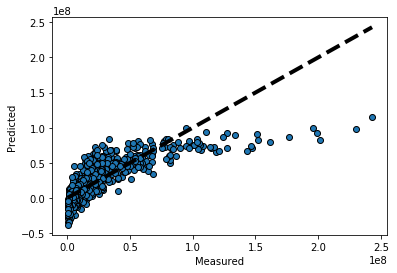

In [16]:
df = data_prep(df_create())
X, y = df_reg(df)[0:2]
scores, predicted = model_reg(X,y)

plot_reg(predicted,y)